# **Parcial Practico Abril Serna Juan Pablo**

Cargue de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/MachineLearning/Parcial/Parcial2/tiendas.xlsx'
df_tiendas = pd.read_excel(file_path)

In [ ]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87661 entries, 0 to 87660
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tienda              87661 non-null  int64 
 1   ventas              87661 non-null  object
 2   aream2              87661 non-null  object
 3   cantidad articulos  87661 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


No se encuentras nulos

In [ ]:
df_tiendas = df_tiendas.drop_duplicates()

In [ ]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87661 entries, 0 to 87660
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tienda              87661 non-null  int64 
 1   ventas              87661 non-null  object
 2   aream2              87661 non-null  object
 3   cantidad articulos  87661 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


No hay datos duplicados

**Outliers**

Como la columna aream2 va en rango, como poer ejemplo 50-100, haremos un promedio de esos dos valores

In [ ]:
df_tiendas.head()

,tienda,ventas,aream2,cantidad articulos
0,100001,2472511,31-45,627
1,100002,1731152,50-100,437
2,100003,1687416,31-45,272
3,100004,748367,16-30,200
4,100005,707991,16-30,138


In [ ]:
def convertir_rango_a_promedio(valor):
    valor = str(valor).lower()
    if '-' in valor:
        min_val, max_val = map(int, valor.split('-'))
        return (min_val + max_val) / 2
    elif 'más de' in valor:
        return int(valor.split('más de')[-1].strip())
    else:
        try:
            return float(valor)
        except ValueError:
            return np.nan
df_tiendas['aream2'] = df_tiendas['aream2'].apply(convertir_rango_a_promedio)
print(df_tiendas['aream2'].head())
df_tiendas = df_tiendas.dropna(subset=['aream2'])
print(df_tiendas.head())

0    38.0
1    75.0
2    38.0
3    23.0
4    23.0
Name: aream2, dtype: float64
   tienda   ventas  aream2  cantidad articulos
0  100001  2472511    38.0                 627
1  100002  1731152    75.0                 437
2  100003  1687416    38.0                 272
3  100004   748367    23.0                 200
4  100005   707991    23.0                 138


In [ ]:
def eliminar_outliers(df, columnas, umbral=1.5):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - umbral * IQR
        limite_superior = Q3 + umbral * IQR
        df = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df
# Convertir las columnas a tipo numérico y manejar errores
df_tiendas['ventas'] = pd.to_numeric(df_tiendas['ventas'], errors='coerce')
df_tiendas['aream2'] = pd.to_numeric(df_tiendas['aream2'], errors='coerce')
df_tiendas['cantidad articulos'] = pd.to_numeric(df_tiendas['cantidad articulos'], errors='coerce')

# Verificar si hay valores NaN después de la conversión
print(df_tiendas.isnull().sum())

# Eliminar filas con valores NaN antes de la limpieza de outliers
df_tiendas = df_tiendas.dropna()

# Aplicar la función para eliminar outliers
df_tiendas_limpio = eliminar_outliers(df_tiendas, columnas_a_limpiar, umbral=1.5)

# Verificar el tamaño y las estadísticas del DataFrame limpio
print(df_tiendas_limpio.shape)
print(df_tiendas_limpio.describe())



tienda                0
ventas                0
aream2                0
cantidad articulos    0
dtype: int64
(76068, 4)
              tienda        ventas        aream2  cantidad articulos
count   76068.000000  7.606800e+04  76068.000000        76068.000000
mean   143899.170269  1.323337e+06     25.350890          157.834438
std     25351.739223  6.152156e+05     13.130502          114.919787
min    100003.000000  0.000000e+00      7.500000            0.000000
25%    121893.500000  7.476800e+05     23.000000           69.000000
50%    144067.500000  1.368089e+06     23.000000          127.000000
75%    165839.250000  1.725390e+06     38.000000          220.000000
max    187660.000000  3.041573e+06     53.000000          509.000000


In [ ]:
# Definir las columnas que se desean limpiar
columnas_a_limpiar = ['ventas', 'aream2', 'cantidad articulos']

# Aplicar la función para eliminar outliers
df_tiendas_limpio = eliminar_outliers(df_tiendas, columnas_a_limpiar, umbral=1.5)

# Verificar el tamaño y las estadísticas del DataFrame limpio
print(df_tiendas_limpio.shape)
print(df_tiendas_limpio.describe())


(76068, 4)
              tienda        ventas        aream2  cantidad articulos
count   76068.000000  7.606800e+04  76068.000000        76068.000000
mean   143899.170269  1.323337e+06     25.350890          157.834438
std     25351.739223  6.152156e+05     13.130502          114.919787
min    100003.000000  0.000000e+00      7.500000            0.000000
25%    121893.500000  7.476800e+05     23.000000           69.000000
50%    144067.500000  1.368089e+06     23.000000          127.000000
75%    165839.250000  1.725390e+06     38.000000          220.000000
max    187660.000000  3.041573e+06     53.000000          509.000000


In [ ]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84566 entries, 0 to 87660
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tienda              84566 non-null  int64  
 1   ventas              84566 non-null  float64
 2   aream2              84566 non-null  float64
 3   cantidad articulos  84566 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 MB


Se eliminaron 3,095 outliers, lo que equivale al 4% de la data




**Clusterización**

K-Means

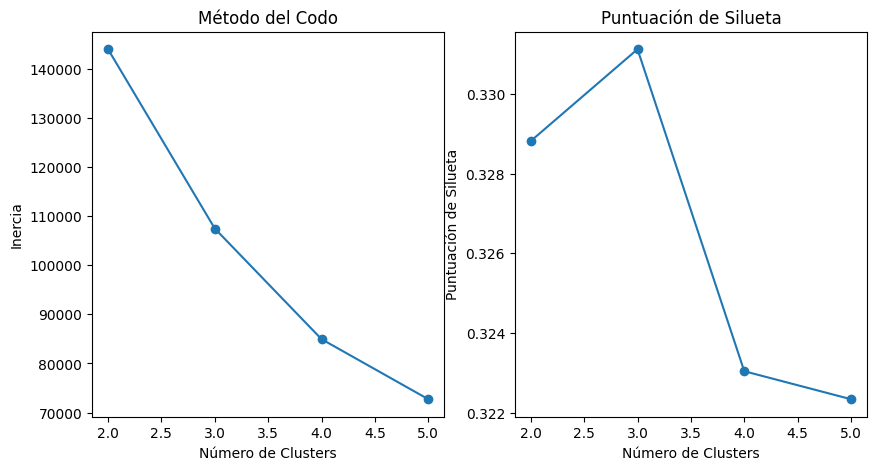

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Supongamos que df_tiendas_limpio ya está limpio y listo

# Paso 1: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_tiendas_limpio[['ventas', 'aream2', 'cantidad articulos']])

# Paso 2: K-means
# Evaluar un rango reducido de clusters para optimizar la memoria
inertia = []
silhouette_scores = []
k_values = range(2, 6)  # Disminuir el rango a 2-5 para reducir el uso de RAM

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualizar el método del codo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Puntuación de Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.show()

# Elegir un número de clusters basado en el método del codo y la puntuación de silueta
n_clusters_kmeans = 3  # Cambiar según los resultados visualizados

# Ejecutar K-means
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
df_tiendas_limpio['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Ajustar según se necesite
df_tiendas_limpio['cluster_dbscan'] = dbscan.fit_predict(X_scaled)


**Clasifficación jerarquica**

Se tomó el 10% de los datos ya que al usar toda la base, tendriamos un consumo alto de RAM colapsando el ambiente de desarrollo, pero aún así la ram no fue suficiente

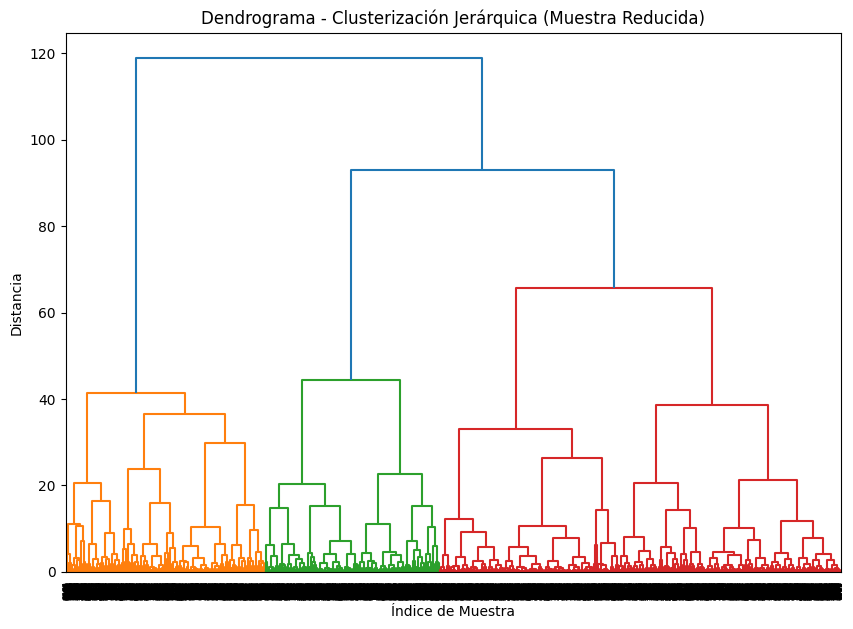

In [ ]:
muestra_df = df_tiendas_limpio.sample(frac=0.1, random_state=42)  # Ajustar el tamaño de la muestra si es necesario
X_muestra_scaled = scaler.transform(muestra_df[['ventas', 'aream2', 'cantidad articulos']])

# Dendrograma - Visualización de una muestra reducida
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_muestra_scaled, method='ward'))
plt.title('Dendrograma - Clusterización Jerárquica (Muestra Reducida)')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Elegir un número de clusters (ejemplo: 3)
n_clusters_hierarchical = 3  # Cambiar según la visualización del dendrograma
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
df_tiendas_limpio['cluster_hierarchical'] = hierarchical.fit_predict(X_scaled)

In [ ]:
print(df_tiendas_limpio[['tienda', 'ventas', 'aream2', 'cantidad articulos', 'cluster_kmeans', 'cluster_dbscan']].head())

   tienda     ventas  aream2  cantidad articulos  cluster_kmeans  \
2  100003  1687416.0    38.0                 272               2   
3  100004   748367.0    23.0                 200               1   
4  100005   707991.0    23.0                 138               1   
5  100006  2628594.0    23.0                 412               2   
6  100007   297796.0    23.0                  52               1   

   cluster_dbscan  
2               0  
3               1  
4               1  
5               1  
6               1  


Caracterización de Clusters - K-means:
   cluster_kmeans  ventas_media  aream2_media  cantidad_articulos_media  \
0               0  1.187151e+06     41.923285                108.849721   
1               1  9.887269e+05     16.841618                 93.809215   
2               2  1.917986e+06     25.387507                288.878332   

   conteo  
0   17767  
1   34704  
2   23597  

Caracterización de Clusters - DBSCAN:
   cluster_dbscan  ventas_media  aream2_media  cantidad_articulos_media  \
0               0  1.378158e+06     38.000000                162.721454   
1               1  1.336265e+06     23.083957                162.039492   
2               2  1.188822e+06      7.500000                141.413560   
3               3  1.483542e+06     53.000000                167.492435   

   conteo  
0   18575  
1   34184  
2   17625  
3    5684  


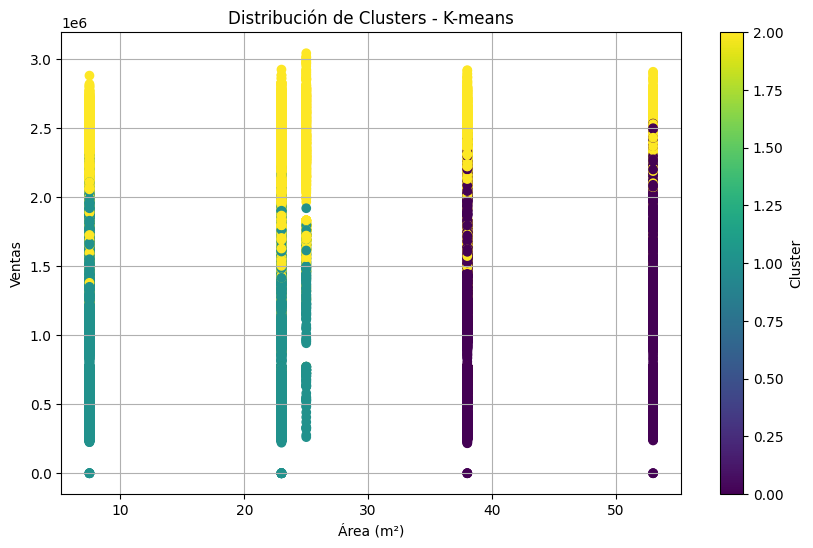

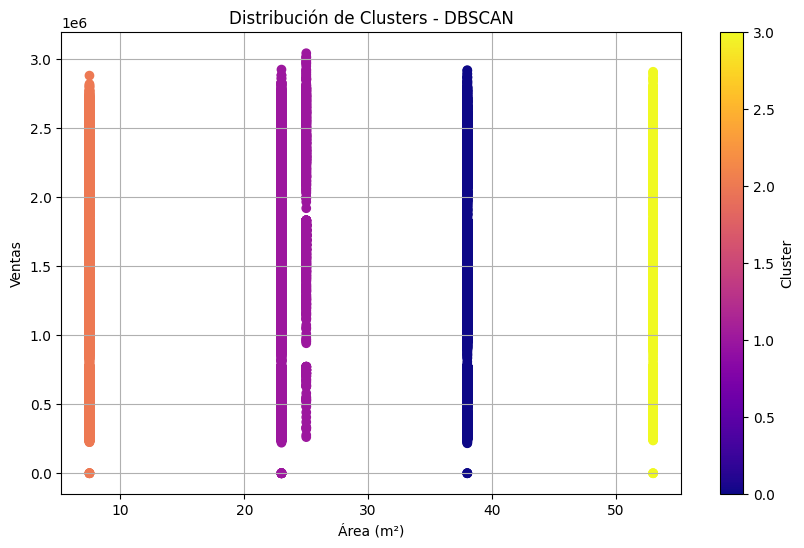

In [ ]:
# Caracterización de K-means
caracteristicas_kmeans = df_tiendas_limpio.groupby('cluster_kmeans').agg(
    ventas_media=('ventas', 'mean'),
    aream2_media=('aream2', 'mean'),
    cantidad_articulos_media=('cantidad articulos', 'mean'),
    conteo=('tienda', 'count')
).reset_index()

print("Caracterización de Clusters - K-means:")
print(caracteristicas_kmeans)

# Caracterización de DBSCAN
caracteristicas_dbscan = df_tiendas_limpio.groupby('cluster_dbscan').agg(
    ventas_media=('ventas', 'mean'),
    aream2_media=('aream2', 'mean'),
    cantidad_articulos_media=('cantidad articulos', 'mean'),
    conteo=('tienda', 'count')
).reset_index()

print("\nCaracterización de Clusters - DBSCAN:")
print(caracteristicas_dbscan)

# Visualización de Clusters - K-means
plt.figure(figsize=(10, 6))
plt.scatter(df_tiendas_limpio['aream2'], df_tiendas_limpio['ventas'], c=df_tiendas_limpio['cluster_kmeans'], cmap='viridis', label='K-means')
plt.title('Distribución de Clusters - K-means')
plt.xlabel('Área (m²)')
plt.ylabel('Ventas')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Visualización de Clusters - DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(df_tiendas_limpio['aream2'], df_tiendas_limpio['ventas'], c=df_tiendas_limpio['cluster_dbscan'], cmap='plasma', label='DBSCAN')
plt.title('Distribución de Clusters - DBSCAN')
plt.xlabel('Área (m²)')
plt.ylabel('Ventas')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [ ]:
# Caracterización de K-means
caracteristicas_kmeans = df_tiendas_limpio.groupby('cluster_kmeans').agg(
    ventas_media=('ventas', 'mean'),
    aream2_media=('aream2', 'mean'),
    cantidad_articulos_media=('cantidad articulos', 'mean'),
    conteo=('tienda', 'count')
).reset_index()

print("Caracterización de Clusters - K-means:")
print(caracteristicas_kmeans)

Caracterización de Clusters - K-means:
   cluster_kmeans  ventas_media  aream2_media  cantidad_articulos_media  \
0               0  1.187151e+06     41.923285                108.849721   
1               1  9.887269e+05     16.841618                 93.809215   
2               2  1.917986e+06     25.387507                288.878332   

   conteo  
0   17767  
1   34704  
2   23597  


In [ ]:
caracteristicas_dbscan = df_tiendas_limpio.groupby('cluster_dbscan').agg(
    ventas_media=('ventas', 'mean'),
    aream2_media=('aream2', 'mean'),
    cantidad_articulos_media=('cantidad articulos', 'mean'),
    conteo=('tienda', 'count')
).reset_index()

print("Caracterización de Clusters - DBSCAN:")
print(caracteristicas_dbscan)


Caracterización de Clusters - DBSCAN:
   cluster_dbscan  ventas_media  aream2_media  cantidad_articulos_media  \
0               0  1.378158e+06     38.000000                162.721454   
1               1  1.336265e+06     23.083957                162.039492   
2               2  1.188822e+06      7.500000                141.413560   
3               3  1.483542e+06     53.000000                167.492435   

   conteo  
0   18575  
1   34184  
2   17625  
3    5684  


# **Regresión Logistica**

In [ ]:
from sklearn.cluster import DBSCAN
# Definir el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
# Ajustar el modelo y asignar los clusters a una nueva columna
df_tiendas['cluster_dbscan'] = dbscan.fit_predict(df_tiendas[['ventas', 'aream2', 'cantidad articulos']])
# Revisar los clusters asignados
print(df_tiendas['cluster_dbscan'].unique())


[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_tiendas[['ventas', 'aream2', 'cantidad articulos']]
y = df_tiendas['cluster_dbscan']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision * 100:.2f}%")

# Mostrar un informe detallado de la clasificación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

# Predicción para una nueva tienda
nueva_tienda = [[1500000, 40, 150]]  # Ejemplo con ventas, área y cantidad de artículos
cluster_predicho = modelo.predict(nueva_tienda)
print(f"El cluster predicho para la nueva tienda es: {cluster_predicho[0]}")


Precisión del modelo: 98.66%
Informe de clasificación:
               precision    recall  f1-score   support

          -1       0.99      1.00      0.99     16688
           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=4)  # Puedes aumentar eps o disminuir min_samples
df_tiendas['cluster_dbscan'] = dbscan.fit_predict(df_tiendas[['ventas', 'aream2', 'cantidad articulos']])
print(df_tiendas['cluster_dbscan'].unique())  # Ver los clusters


[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

Regresión logistica con Kmeans

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters (puedes ajustar el número según los resultados que obtuviste antes)
kmeans = KMeans(n_clusters=3, random_state=42)

# Entrenar el modelo de K-means con las características relevantes
df_tiendas['cluster_kmeans'] = kmeans.fit_predict(df_tiendas[['ventas', 'aream2', 'cantidad articulos']])

# Ver los primeros resultados
print(df_tiendas[['tienda', 'ventas', 'aream2', 'cantidad articulos', 'cluster_kmeans']].head())


   tienda     ventas  aream2  cantidad articulos  cluster_kmeans
0  100001  2472511.0    38.0                 627               2
1  100002  1731152.0    75.0                 437               0
2  100003  1687416.0    38.0                 272               0
3  100004   748367.0    23.0                 200               1
4  100005   707991.0    23.0                 138               1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Separar las características y el objetivo (clusters de K-means)
X = df_tiendas[['ventas', 'aream2', 'cantidad articulos']]
y = df_tiendas['cluster_kmeans']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo_logistico.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predecir el cluster para una nueva tienda
nueva_tienda = [[2000000, 30, 150]]  # Ejemplo de nueva tienda con ventas, área y cantidad de artículos
cluster_predicho = modelo_logistico.predict(nueva_tienda)
print(f"El cluster predicho para la nueva tienda es: {cluster_predicho[0]}")


Accuracy: 0.9996846669294442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12609
           1       1.00      1.00      1.00      8274
           2       1.00      1.00      1.00      4487

    accuracy                           1.00     25370
   macro avg       1.00      1.00      1.00     25370
weighted avg       1.00      1.00      1.00     25370

El cluster predicho para la nueva tienda es: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
caracterizacion_cluster = df_tiendas[df_tiendas['cluster_kmeans'] == 2].describe()
print("Caracterización del Cluster 2:")
print(caracterizacion_cluster)


Caracterización del Cluster 2:
              tienda        ventas        aream2  cantidad articulos  \
count   15021.000000  1.502100e+04  15021.000000        15021.000000   
mean   140394.274283  2.427378e+06     41.276480          371.976699   
std     24984.139753  2.368561e+05     38.824254          223.508661   
min    100001.000000  1.983460e+06      7.500000           24.000000   
25%    118839.000000  2.248673e+06     23.000000          206.000000   
50%    137911.000000  2.401057e+06     25.000000          330.000000   
75%    161159.000000  2.594104e+06     53.000000          478.000000   
max    187642.000000  3.886967e+06    275.000000         2157.000000   

       cluster_dbscan  cluster_kmeans  
count         15021.0         15021.0  
mean             -1.0             2.0  
std               0.0             0.0  
min              -1.0             2.0  
25%              -1.0             2.0  
50%              -1.0             2.0  
75%              -1.0             2.0  


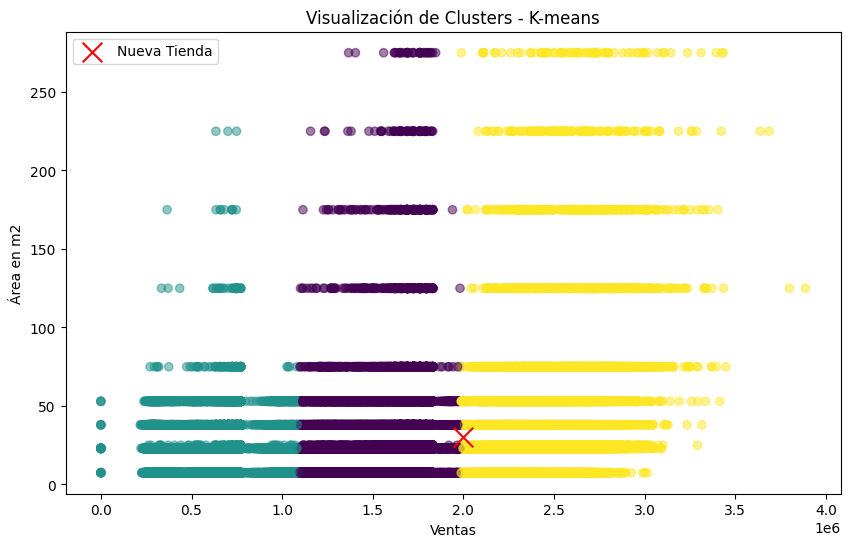

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_tiendas['ventas'], df_tiendas['aream2'], c=df_tiendas['cluster_kmeans'], cmap='viridis', alpha=0.5)
plt.scatter(2000000, 30, c='red', marker='x', s=200, label='Nueva Tienda')
plt.title('Visualización de Clusters - K-means')
plt.xlabel('Ventas')
plt.ylabel('Área en m2')
plt.legend()
plt.show()
